Accuracy: 0.8194444444444444
                   precision    recall  f1-score   support

     account_help       1.00      1.00      1.00         4
      book_flight       1.00      1.00      1.00         5
       book_hotel       1.00      0.75      0.86         4
  book_restaurant       1.00      0.50      0.67         4
   cancel_booking       1.00      1.00      1.00         4
  find_restaurant       0.80      1.00      0.89         4
         fun_fact       0.00      0.00      0.00         1
        fun_query       0.67      1.00      0.80         6
          goodbye       0.00      0.00      0.00         1
         greeting       0.00      0.00      0.00         1
negative_feedback       0.38      0.60      0.46         5
       news_query       1.00      1.00      1.00         5
     order_status       1.00      1.00      1.00         4
       play_music       0.00      0.00      0.00         1
positive_feedback       0.50      0.60      0.55         5
      stock_query       1.

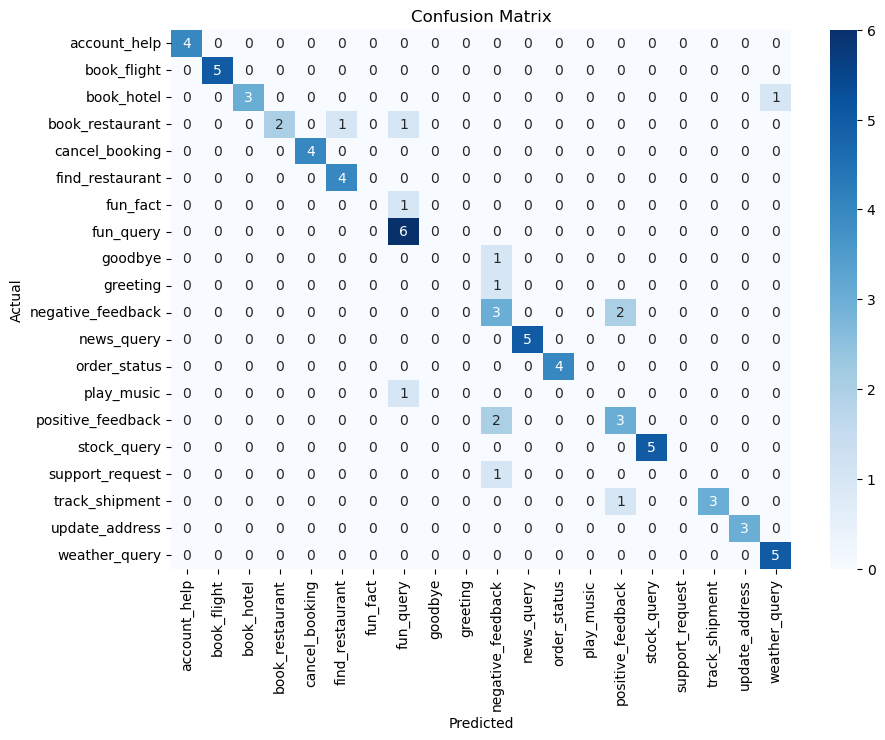

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('chatbot_intents.csv')

# Filter out classes with fewer than 2 samples
intent_counts = df['intent'].value_counts()
df = df[df['intent'].isin(intent_counts[intent_counts >= 2].index)]

# Vectorize queries
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['query'])

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['intent'])
import joblib
joblib.dump(le, "label_encoder.pkl")


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # Now gives 30 test samples if total is ~100
)




# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
target_names = le.inverse_transform(sorted(set(y_test)))
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [7]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
